<a href="https://colab.research.google.com/github/WinstonQF/techchallenges/blob/main/fase01/notebook/Tech_Challange_Consolidado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech challenge Grupo 03
---

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

## Classes auxiliares


In [56]:
class ModelMetrics:
    def __init__(self, name, mae, mse, r_square_score, rmse ):
        self._name = name
        self._mae = mae
        self._mse = mse
        self._r_square_score = r_square_score
        self._rmse = rmse

    @property
    def name(self):
        return self._name

    @property
    def mae(self):
        return self._mae

    @property
    def mse(self):
        return self._mse

    @property
    def r_square_score(self):
        return self._r_square_score

    @property
    def rmse(self):
        return self._rmse


## Análise Exploratória de Dados (EDA)

### Carga dos dados

In [57]:
df = pd.read_csv('https://github.com/FIAP/CURSO_IA_ML/blob/main/Desafio/insurance.csv?raw=true')

### Compreensão dos Dados

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Aqui podemos notar que existem 3 dados categóricos que são: sex, smoker e region.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
df.shape

(1338, 7)

Aqui podemos ver que existem 1338 linhas e 7 colunas.

Aqui podemos identificar que não temos nenhum dado nulo, pois a coluna Non-Null Count contém os mesmos valores de nosso dataset, demonstrado no comando mais acima. Também podemos identificar o tipo de dados de cada classe. Que no caso, temos o age e o children como int, o sex, o smoker e o region como object e o bmi e charges como float. Confirmando que as classes categóricas são sex, smoker e region.

In [62]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Confirmando o que foi constatado acima, de que não existem dados nulos.

### Estatísticas Descritivas

In [63]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Conforme podemos analisar, na tabela a cima, em todas as colunas temos a quantidade total de dados, que é 1338.

A média de idade é de 14, a idade mínima é 18 e máximo de 64.
No BMI, a média é de 30.66, o máximo é 53.13 e o mínimo é 15.96.
A média do número de filhos é de 1 o máximo é 5 e o mínimo é 0.

#### Idade

<Figure size 500x500 with 0 Axes>

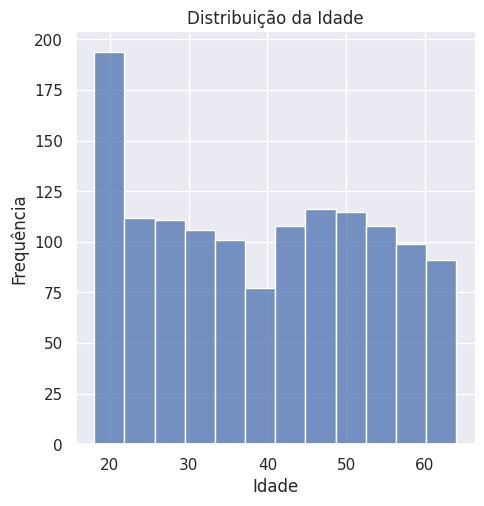

In [64]:
# Distribuição do valor age
sns.set()
plt.figure(figsize=(5, 5))
sns.displot(data=df, x=df['age'])
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

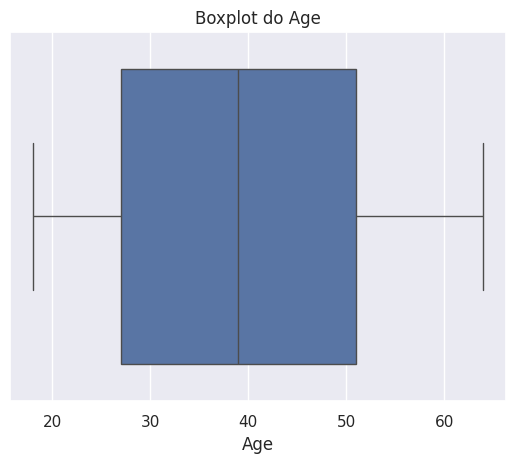

In [65]:
sns.boxplot(x=df['age'])
plt.title('Boxplot do Age')
plt.xlabel('Age')
plt.show()

#### Sexo

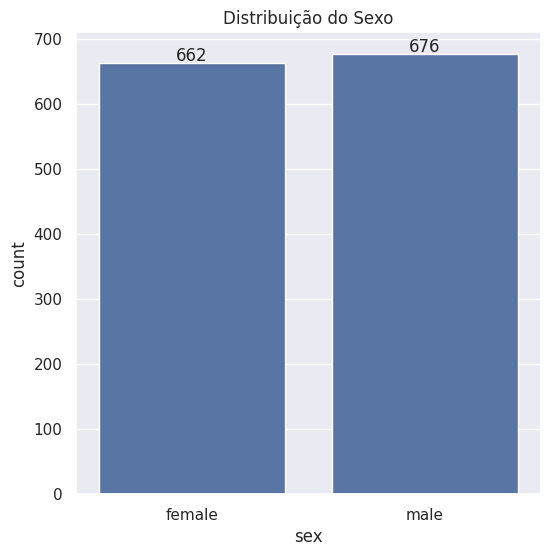

In [66]:
# Coluna de genero
sns.set()
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='sex')
plt.title('Distribuição do Sexo')

# Adicionar os números dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha="center")

plt.show()

A distribuição entre sexos masculino e feminino tem uma leve predoninância do sexo masculino (676 homens contra 662 mulheres). Essa diferença de 14 indivíduos não é significativa o suficiente para gerar preocupações sobre vieses no modelo de machine learning a ser treinado.


#### IMC

<Figure size 600x600 with 0 Axes>

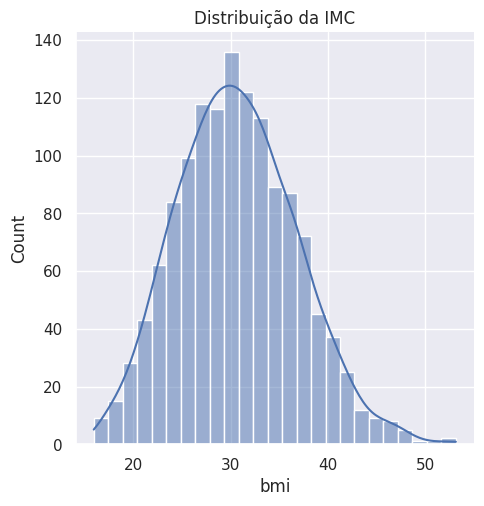

In [67]:
# Distribuição do valor bmi
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(data=df, x=df['bmi'], kde=True)
plt.title('Distribuição da IMC')
plt.show()

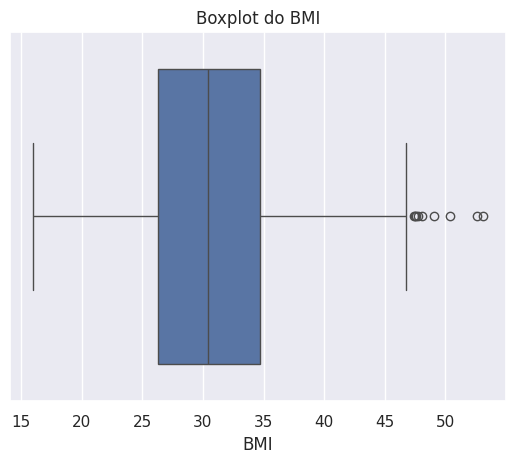

In [68]:
sns.boxplot(x=df['bmi'])
plt.title('Boxplot do BMI')
plt.xlabel('BMI')
plt.show()

* É possível a presença de outliers, ou seja, valores de IMC muito altos que se distanciam da maioria dos dados. Isso pode ser investigado com mais detalhes utilizando boxplots ou cálculos de z-score.
* É esperado que o IMC tenha uma correlação positiva com o custo médico ("charges"), uma vez que pessoas com IMC mais alto tendem a ter maiores riscos de desenvolver problemas de saúde. Essa relação pode ser explorada através de gráficos de dispersão e cálculo da matriz de correlação.

#### Filhos

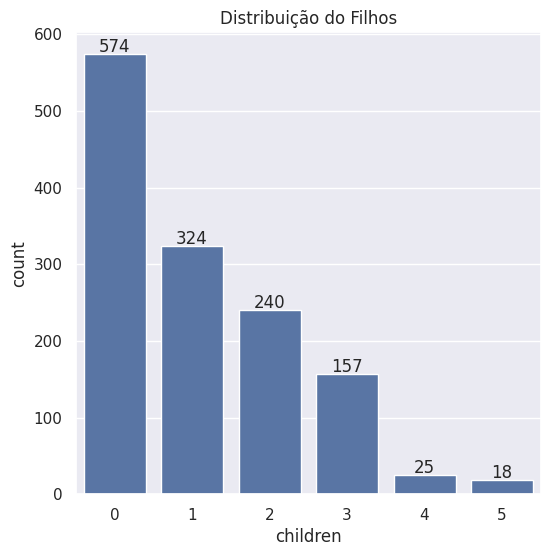

In [69]:
# Coluna de children
sns.set()
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='children')
plt.title('Distribuição do Filhos')

# Adicionar os números dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha="center")

plt.show()

A maioria dos indivíduos na base de dados não possui filhos (574 pessoas), representando a categoria mais frequente. As demais categorias (1, 2, 3, 4 e 5 filhos) possuem frequências menores e relativamente próximas entre si.

Essa distribuição sugere que a presença de filhos pode ter um impacto no custo médico, mas possivelmente com menor influência em comparação a outras variáveis, como "smoker" (fumante) ou "bmi" (IMC).



#### Fumantes

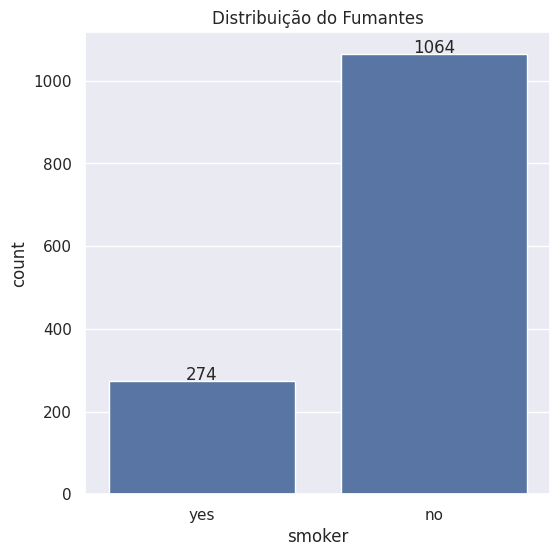

In [70]:
# Coluna de smoker
sns.set()
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='smoker')
plt.title('Distribuição do Fumantes')

# Adicionar os números dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha="center")

plt.show()

A análise da coluna "smoker" (fumante) demonstra um desbalanceamento significativo entre as categorias, com a grande maioria dos indivíduos sendo não fumantes (1064) em comparação com fumantes (274).

Apesar do desbalanceamento, a variável "smoker" é crucial para a previsão de custos médicos, pois é esperado que fumantes tenham custos significativamente mais altos devido aos riscos à saúde associados ao hábito de fumar.

#### Região

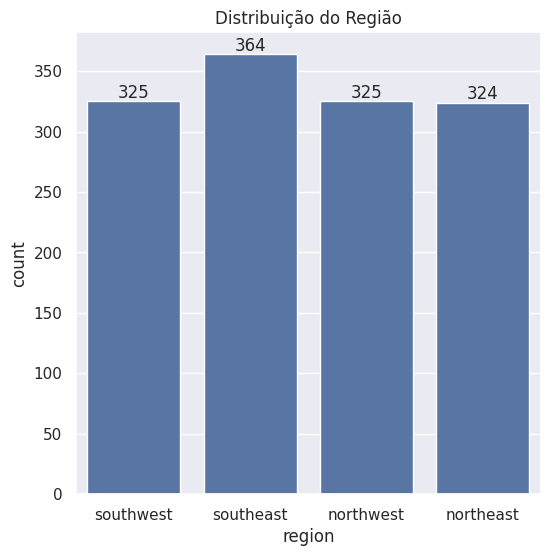

In [71]:
# Coluna de region
sns.set()
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='region')
plt.title('Distribuição do Região')

# Adicionar os números dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha="center")

plt.show()

A coluna "region" (região) apresenta uma distribuição relativamente equilibrada entre as quatro categorias (northeast, northwest, southeast e southwest), com uma leve predominância da região southeast.

Essa distribuição sugere que a região pode ter alguma influência no custo médico, possivelmente devido a diferenças nos custos de vida, acesso a serviços de saúde ou prevalência de determinadas doenças em cada região.

#### Custos médicos

<Figure size 600x600 with 0 Axes>

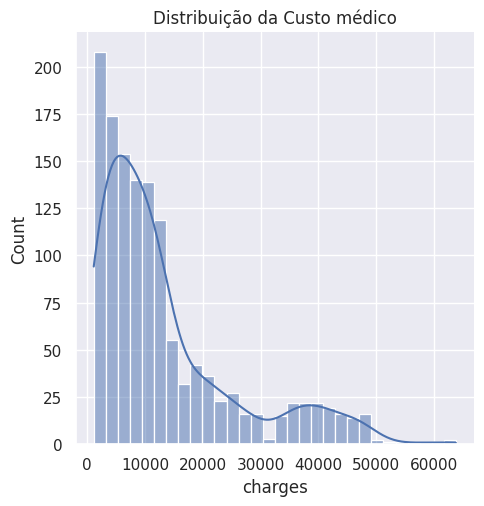

In [72]:
# Distribuição do valor charges
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(data=df, x=df['charges'], kde=True)
plt.title('Distribuição da Custo médico')
plt.show()

<Figure size 1000x500 with 0 Axes>

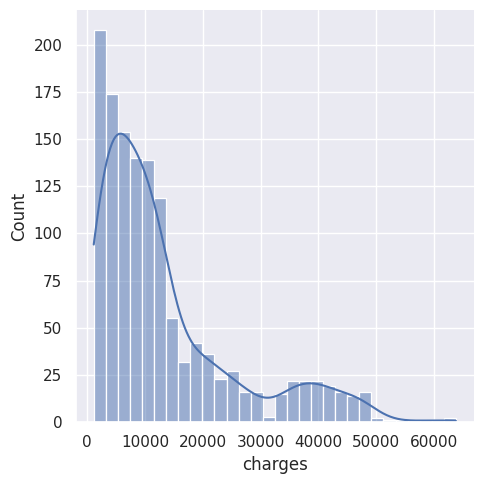

In [73]:
plt.figure(figsize = (10,5))
sns.displot(df['charges'], kde=True)

### Identificação Outliers (Z-Score)

In [74]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Número de outliers",len(outliers))

In [75]:
out_zscore(df.charges)

Número de outliers 7


<Figure size 1000x500 with 0 Axes>

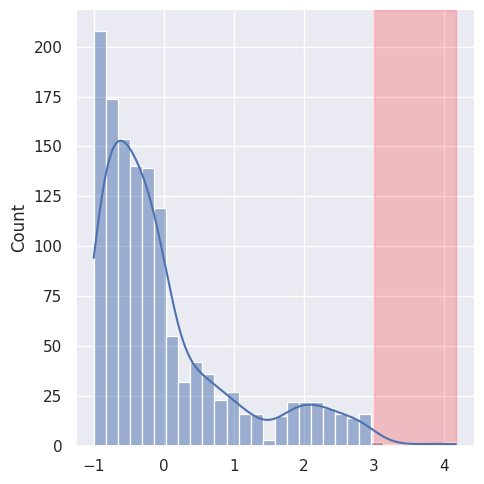

In [76]:
plt.figure(figsize = (10,5))
sns.displot(zscore, kde=True)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

### Scatters

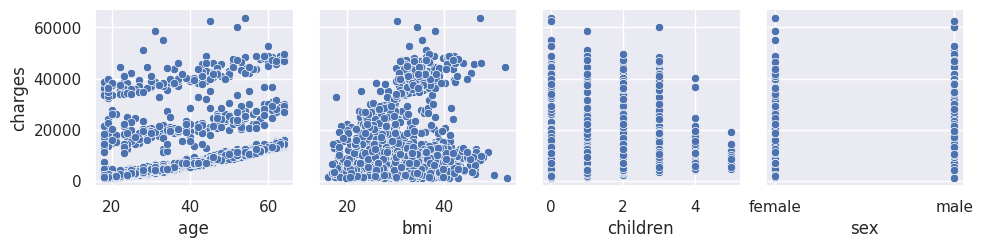

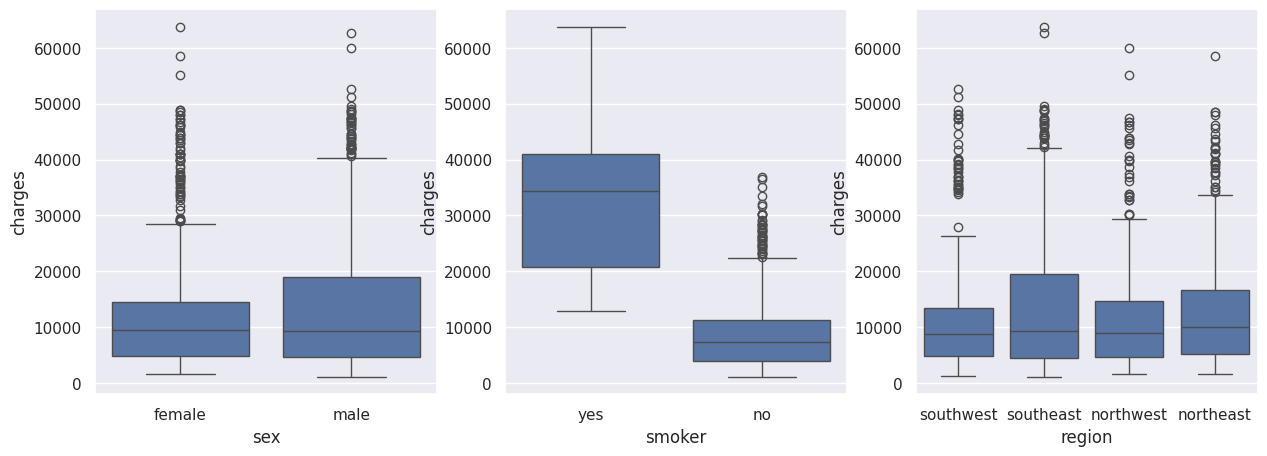

In [77]:
# Distribuição das variáveis numéricas em relação a "charges"
# adicionado sex na linha abaixo
sns.pairplot(df, x_vars=["age", "bmi", "children","sex"], y_vars=["charges"], kind="scatter")
# Quantidade das variáveis categóricas em relação a "charges"
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x="sex", y="charges", data=df)

plt.subplot(1,3,2)
sns.boxplot(x="smoker", y="charges", data=df)

plt.subplot(1,3,3)
sns.boxplot(x="region", y="charges", data=df)

plt.show()


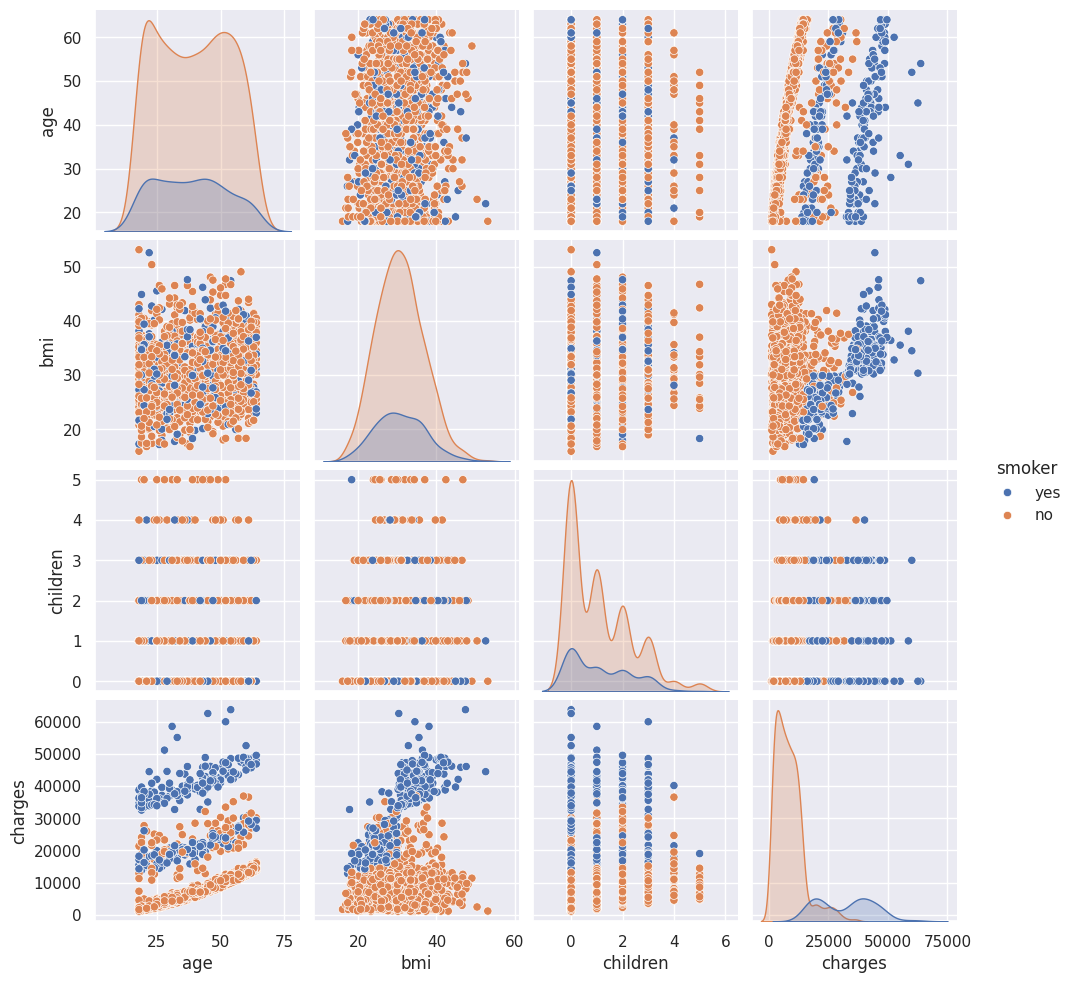

In [78]:
sns.pairplot(df, hue="smoker")
plt.show()

### Matriz de Correlação

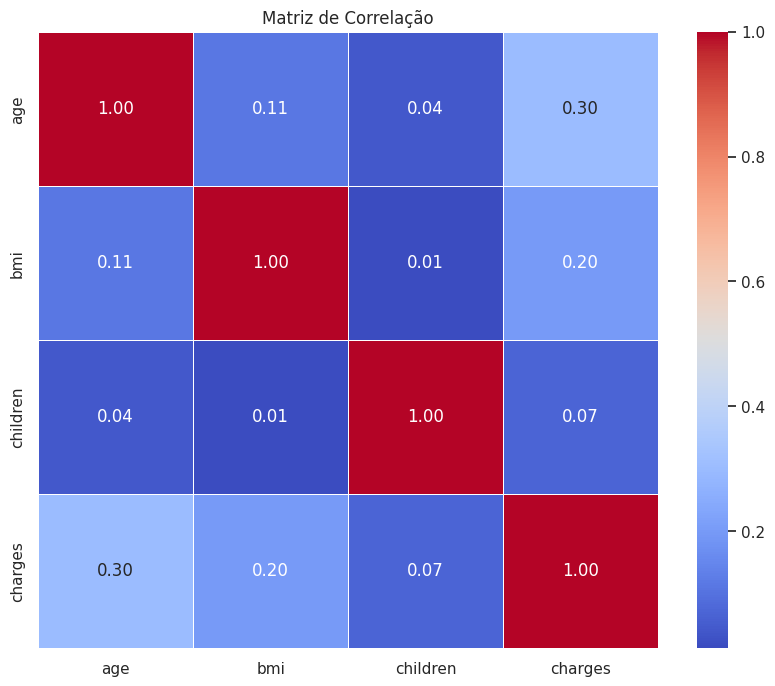

In [79]:
df_numerico = df.select_dtypes(include=['float', 'int'])
correlation_matrix = df_numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="0.2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

## Pré-processamento dos dados

### Codificação de Variáveis Categóricas

In [80]:
label_encoder = LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['sex'] = label_encoder.fit_transform(df['sex'])
# df['region'] = label_encoder.fit_transform(df['region'])
df = pd.get_dummies(df, columns=['region'], prefix='region', dtype=int)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


### Matriz de Correlação com variáveis categóricas codificadas

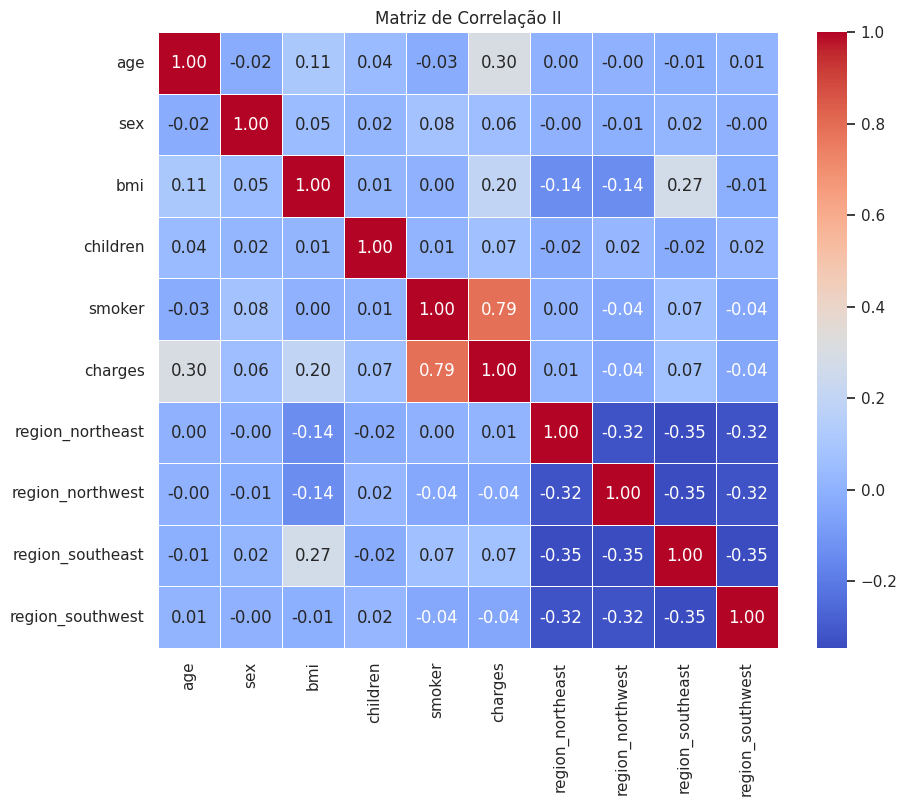

In [81]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="0.2f", linewidths=0.5)
plt.title('Matriz de Correlação II')
plt.show()

Na matriz de correlação podemos notar que a relação mais forte é entre "charges" e "smoker", seguida por "age" e "bmi". A região "southeast" apresenta uma ligeira correlação positiva com "bmi", o que pode indicar um padrão regional de saúde a ser investigado. É importante analisar essas correlações para entender quais variáveis têm maior impacto no custo do seguro.

### Tratamento de Valores Ausentes

Não há dados nulos ou valores ausentes no conjunto de dados utilizados.

### Normalização dos Dados

In [82]:
# Colunas a serem normalizadas - Não incluir dados boleanos
columns_to_normalize = ['age', 'bmi', 'children']

#### StandardScaler

In [83]:
from sklearn.preprocessing import StandardScaler
normalizacao_standard = df.copy()

# Aplicar a normalização Standard
scaler = StandardScaler()
normalizacao_standard[columns_to_normalize] = scaler.fit_transform(normalizacao_standard[columns_to_normalize])
normalizacao_standard

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,0,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,0,0,1,0
2,-0.797954,1,0.383307,1.580926,0,4449.46200,0,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,0,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,10600.54830,0,1,0,0
1334,-1.509965,0,0.206139,-0.908614,0,2205.98080,1,0,0,0
1335,-1.509965,0,1.014878,-0.908614,0,1629.83350,0,0,1,0
1336,-1.296362,0,-0.797813,-0.908614,0,2007.94500,0,0,0,1


#### MinMaxScaler

In [84]:
from sklearn.preprocessing import MinMaxScaler
normalizacao_min_max = df.copy()

# Aplicar a normalização Min-Max
scaler_mm = MinMaxScaler()
normalizacao_min_max[columns_to_normalize] = scaler_mm.fit_transform(normalizacao_min_max[columns_to_normalize])
normalizacao_min_max

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,16884.92400,0,0,0,1
1,0.000000,1,0.479150,0.2,0,1725.55230,0,0,1,0
2,0.217391,1,0.458434,0.6,0,4449.46200,0,0,1,0
3,0.326087,1,0.181464,0.0,0,21984.47061,0,1,0,0
4,0.304348,1,0.347592,0.0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.6,0,10600.54830,0,1,0,0
1334,0.000000,0,0.429379,0.0,0,2205.98080,1,0,0,0
1335,0.000000,0,0.562012,0.0,0,1629.83350,0,0,1,0
1336,0.065217,0,0.264730,0.0,0,2007.94500,0,0,0,1


## Seleção de Modelo

In [85]:
X = df.drop('charges', axis=1)
y = df['charges']
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [86]:
# Normalização Standard
X_standard = normalizacao_standard.drop('charges', axis=1)
y_standard = normalizacao_standard['charges']
X_standard.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,0,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,0,0,1,0
2,-0.797954,1,0.383307,1.580926,0,0,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,0,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,0,1,0,0


In [87]:
# Normalização MinMaxScaler
X_mm = normalizacao_min_max.drop('charges', axis=1)
y_mm = normalizacao_min_max['charges']
X_mm.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,0,0,0,1
1,0.000000,1,0.479150,0.2,0,0,0,1,0
2,0.217391,1,0.458434,0.6,0,0,0,1,0
3,0.326087,1,0.181464,0.0,0,0,1,0,0
4,0.304348,1,0.347592,0.0,0,0,1,0,0


In [88]:
from enum import Enum
class NormalizationType(Enum):
    NONE = 0
    STANDARD = 1
    MIN_MAX = 2

In [89]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Defina os modelos a serem testados
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42),
    'SVR': SVR(),
    'Lasso Regression': Lasso(random_state=42),
    'KNN Regressor': KNeighborsRegressor(),
}

normalize_type = input("Digite o tipo de normalização (0 - none, 1 - standard, 2 - min_max): ")

def setup_normalization(normalization_type: NormalizationType = NormalizationType.NONE):
  match normalization_type:
    case NormalizationType.NONE:
      return train_test_split(X, y, test_size=0.2, random_state=42)
    case NormalizationType.STANDARD:
      return train_test_split(X_standard, y_standard, test_size=0.2, random_state=42)
    case NormalizationType.MIN_MAX:
      return train_test_split(X_mm, y_mm, test_size=0.2, random_state=42)
    case _:
      raise ValueError("Invalid normalization type")

X_train, X_test, y_train, y_test = setup_normalization(NormalizationType(int(normalize_type)))

# Avalie cada modelo usando validação cruzada
results = {}
for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results[name] = -cv_scores.mean()  # Use o erro quadrático médio negativo para seleção

# Ordena os modelos pelo MSE médio em ordem crescente
sorted_results = sorted(results.items(), key=lambda item: item[1])

# Imprime a lista ordenada de modelos
print("Modelos ordenados por MSE médio (crescente):")
for name, mse in sorted_results:
    print('\n')
    print(f'Modelo: {name} \nMSE: {mse:.4f}')
    print('===================================')

# # Selecione o modelo com o menor erro quadrático médio
# best_model_name = min(results, key=results.get)
# print(f'O melhor modelo é: {best_model_name} com MSE médio de {results[best_model_name]:.4f}')

# # Treine o melhor modelo com todos os dados de treino
# best_model = models[best_model_name]
# best_model.fit(X_train, y_train)

Digite o tipo de normalização (0 - none, 1 - standard, 2 - min_max): 1
Modelos ordenados por MSE médio (crescente):


Modelo: Gradient Boosting 
MSE: 21916285.4079


Modelo: Random Forest 
MSE: 24119968.9484


Modelo: XGBoost Regressor 
MSE: 29942401.8285


Modelo: Lasso Regression 
MSE: 37735826.2454


Modelo: Linear Regression 
MSE: 37737178.5615


Modelo: Ridge Regression 
MSE: 37740517.3804


Modelo: Decision Tree 
MSE: 43134004.1420


Modelo: KNN Regressor 
MSE: 55422587.6272


Modelo: SVR 
MSE: 158506434.4279


## Ajuste de Hiperparâmetros

In [90]:
# Função para avaliação de hiperparâmetros
def hyperparam_tuning(model, param_grid, X_train, y_train, scoring=None):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scoring)
    grid_search.fit(X_train, y_train)
    print("Melhores hiperparâmetros:", grid_search.best_params_)

    best_model = grid_search.best_estimator_
    return best_model

In [91]:
def perguntar_hiperparametros():
  """Pergunta ao usuário se deseja realizar o ajuste de hiperparâmetros."""
  resposta = input("Deseja realizar o ajuste de hiperparâmetros? (s/n): ")
  return resposta.lower() == 's'

In [92]:
# Defina os hiperparâmetros a serem testados
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# if perguntar_hiperparametros():
#   print("Iniciando o ajuste de hiperparâmetros...")
#   # Treinamento do GB Model
#   hyperparam_tuning(GradientBoostingRegressor(random_state=42), param_grid_gb, X_train, y_train, scoring='neg_mean_squared_error')
# else:
#   print("Prosseguindo sem ajuste de hiperparâmetros.")


## Treinamento e Avaliação do Modelo

### Outliers - Tratamento com Z-Score

In [93]:
df.shape

(1338, 10)

In [94]:
from scipy import stats

def remover_outliers_zscore(X_train, y_train, limiar=3):
  """
  Remove outliers dos dados de treino X_train e y_train usando o Z-score.

  Args:
    X_train: Dados de treino (features).
    y_train: Variável alvo dos dados de treino.
    limiar: Limiar do Z-score para considerar um valor como outlier.

  Returns:
    X_train_sem_outliers: Dados de treino sem outliers.
    y_train_sem_outliers: Variável alvo sem outliers.
  """

  # Concatenando X_train e y_train para aplicar o Z-score em todos os dados
  dados_treino = np.column_stack((X_train, y_train))

  # Calculando o Z-score para todos os valores
  z_scores = np.abs(stats.zscore(dados_treino))

  # Filtrando os dados para remover outliers
  indices_sem_outliers = (z_scores < limiar).all(axis=1)
  dados_treino_sem_outliers = dados_treino[indices_sem_outliers]

  # Separando novamente X_train e y_train sem outliers
  X_train_sem_outliers = dados_treino_sem_outliers[:, :-1]
  y_train_sem_outliers = dados_treino_sem_outliers[:, -1]

  return X_train_sem_outliers, y_train_sem_outliers


### Setup de modelos

In [95]:
import pickle
def save_model(model):
  falename = "model_v1.pkl"
  pickle.dump(model, open(falename, 'wb'))

In [96]:
df_metrics = []

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test, outliers):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  if model_name == 'Gradient Bosting Regressor (com outliers)':
    save_model(model)

  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mse)

  # Avaliação do modelo
  print(f'Modelo: {model_name}')
  print('MAE:', mae)
  print('MSE:', mse)
  print('R² Score:', r2)
  print('RMSE:', rmse)
  print('\n')

  model_metrics = {
      'Modelo': model_name,
      'MAE': mae,
      'MSE': mse,
      'R² Score': r2,
      'RMSE': rmse,
      'Outliers': outliers
  }
  df_metrics.append(model_metrics)


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divida os dados em treino e teste sem outliers, com zscore
X_train_sem_outliers, y_train_sem_outliers = remover_outliers_zscore(X_train, y_train, limiar=2.5)


### Linear Regression


In [98]:
lr = LinearRegression()

X_train.head()

# Modelo com outliers
train_and_evaluate_model('Linear Regression', lr, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('Linear Regression', lr, X_train_sem_outliers, y_train_sem_outliers, X_test, y_test, 'N')

Modelo: Linear Regression
MAE: 4181.194473753643
MSE: 33596915.85136146
R² Score: 0.7835929767120723
RMSE: 5796.2846592762735


Modelo: Linear Regression
MAE: 4240.1302022020955
MSE: 35748657.29514318
R² Score: 0.7697330151967299
RMSE: 5979.0180878755655




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Ridge Regression

In [99]:
rr = Ridge()

# Modelo com outliers
train_and_evaluate_model('Ridge Regression', rr, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('Ridge Regression', rr, X_train_sem_outliers, y_train_sem_outliers, X_test, y_test, 'N')

Modelo: Ridge Regression
MAE: 4193.348192170579
MSE: 33642947.83507097
R² Score: 0.7832964719788794
RMSE: 5800.254118146115


Modelo: Ridge Regression
MAE: 4253.99951841029
MSE: 35934731.74304692
R² Score: 0.768534458235164
RMSE: 5994.558511103793




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


### Decision Tree

In [100]:
dt = DecisionTreeRegressor(random_state=42)

# Modelo com outliers
train_and_evaluate_model('Decision Tree', dt, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('Decision Tree', dt, X_train_sem_outliers, y_train_sem_outliers, X_test, y_test, 'N')

Modelo: Decision Tree
MAE: 3346.800375768657
MSE: 47637603.27136441
R² Score: 0.6931530273154684
RMSE: 6901.99994721562


Modelo: Decision Tree
MAE: 2853.11929941791
MSE: 36376776.80471301
R² Score: 0.765687123784064
RMSE: 6031.316340958499




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


### XGBoost Regressor

In [101]:
xgb_model = xgb.XGBRegressor(random_state=42)

# Modelo com outliers
train_and_evaluate_model('XGBoost Regressor', xgb_model, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('XGBoost Regressor',
                         xgb_model, X_train_sem_outliers,
                         y_train_sem_outliers,
                         X_test,
                         y_test,
                         'N')

Modelo: XGBoost Regressor
MAE: 2636.7436433506564
MSE: 23114508.885583766
R² Score: 0.8511130579716937
RMSE: 4807.7550775371


Modelo: XGBoost Regressor
MAE: 2910.4544912910155
MSE: 25973238.616136495
R² Score: 0.8326991894454687
RMSE: 5096.394668403978




### SVR


In [102]:
svr = SVR()

# Modelo com outliers
train_and_evaluate_model('SVR', svr, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('SVR', svr, X_train_sem_outliers, y_train_sem_outliers, X_test, y_test, 'N')

Modelo: SVR
MAE: 8597.6930697437
MSE: 166497302.05685556
R² Score: -0.07245515281828974
RMSE: 12903.3833569671


Modelo: SVR
MAE: 8570.016383022677
MSE: 168813061.34595156
R² Score: -0.08737159862009469
RMSE: 12992.808062384034




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


### Lasso Regression

In [103]:
lasso = Lasso(random_state=42)

# Modelo com outliers
train_and_evaluate_model('Lasso Regression', lasso, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('Lasso Regression', lasso, X_train_sem_outliers, y_train_sem_outliers, X_test, y_test, 'N')

Modelo: Lasso Regression
MAE: 4182.29697940532
MSE: 33605932.26390232
R² Score: 0.7835348995061961
RMSE: 5797.062382267619


Modelo: Lasso Regression
MAE: 4240.961097968525
MSE: 35762144.95010543
R² Score: 0.7696461374822864
RMSE: 5980.1458970584845




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


### KNN


In [104]:
knn = KNeighborsRegressor()

# Modelo com outliers
train_and_evaluate_model('KNN Regressor', knn, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('KNN Regressor', knn, X_train_sem_outliers, y_train_sem_outliers, X_test, y_test, 'N')

Modelo: KNN Regressor
MAE: 7708.407456802239
MSE: 129411489.93355128
R² Score: 0.1664248159064109
RMSE: 11375.917102965865


Modelo: KNN Regressor
MAE: 7411.634006526119
MSE: 136669155.9790678
R² Score: 0.11967618243431632
RMSE: 11690.55841177263




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


### Gradient Boosting Regressor

In [105]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(learning_rate=0.1,
                                     max_depth=3,
                                     min_samples_leaf=2,
                                     min_samples_split=2,
                                     n_estimators=50)

# Modelo com outliers
train_and_evaluate_model('Gradient Bosting Regressor', gb_model, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('Gradient Bosting Regressor',
                         gb_model, X_train_sem_outliers,
                         y_train_sem_outliers,
                         X_test,
                         y_test,
                         'N')

Modelo: Gradient Bosting Regressor
MAE: 2435.949204078143
MSE: 18412387.386590492
R² Score: 0.8814007225072487
RMSE: 4290.965787161498


Modelo: Gradient Bosting Regressor
MAE: 2584.8624424025525
MSE: 19877968.555723637
R² Score: 0.8719605090185426
RMSE: 4458.471549278254




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


### Random Forest

In [106]:
# Modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Modelo com outliers
train_and_evaluate_model('Random Forest', rf_model, X_train, y_train, X_test, y_test, 'Y')

# Modelo sem outliers
train_and_evaluate_model('Random Forest',
                         rf_model, X_train_sem_outliers,
                         y_train_sem_outliers,
                         X_test,
                         y_test,
                         'N')


Modelo: Random Forest
MAE: 2555.386273950157
MSE: 21139478.91039691
R² Score: 0.8638347720637121
RMSE: 4597.7689057190455


Modelo: Random Forest
MAE: 2586.475310218723
MSE: 22330793.266995978
R² Score: 0.8561611869390426
RMSE: 4725.546874912572




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## Resultados

In [127]:
df_m = pd.DataFrame(df_metrics)
df_m

,Modelo,MAE,MSE,R² Score,RMSE,Outliers
0,Linear Regression,4181.194474,3.359692e+07,0.783593,5796.284659,Y
1,Linear Regression,4240.130202,3.574866e+07,0.769733,5979.018088,N
2,Ridge Regression,4193.348192,3.364295e+07,0.783296,5800.254118,Y
3,Ridge Regression,4253.999518,3.593473e+07,0.768534,5994.558511,N
4,Decision Tree,3346.800376,4.763760e+07,0.693153,6901.999947,Y
5,Decision Tree,2853.119299,3.637678e+07,0.765687,6031.316341,N
6,XGBoost Regressor,2636.743643,2.311451e+07,0.851113,4807.755078,Y
7,XGBoost Regressor,2910.454491,2.597324e+07,0.832699,5096.394668,N
8,SVR,8597.693070,1.664973e+08,-0.072455,12903.383357,Y
9,SVR,8570.016383,1.688131e+08,-0.087372,12992.808062,N


In [131]:
# Continue with the rest of your code

df_pivot = df_m.pivot(index='Modelo', columns='Outliers', values=['MAE', 'MSE', 'R² Score', 'RMSE'])
df_pivot.style.set_properties(**{'text-align': 'left'})
df_pivot[('MSE', 'Y')] = df_pivot[('MSE', 'Y')].map('{:,.2f}'.format)
df_pivot[('MSE', 'N')] = df_pivot[('MSE', 'N')].map('{:,.2f}'.format)
df_pivot

MAE                          MSE  \
Outliers                              N            Y               N   
Modelo                                                                 
Decision Tree               2853.119299  3346.800376   36,376,776.80   
Gradient Bosting Regressor  2584.862442  2435.949204   19,877,968.56   
KNN Regressor               7411.634007  7708.407457  136,669,155.98   
Lasso Regression            4240.961098  4182.296979   35,762,144.95   
Linear Regression           4240.130202  4181.194474   35,748,657.30   
Random Forest               2586.475310  2555.386274   22,330,793.27   
Ridge Regression            4253.999518  4193.348192   35,934,731.74   
SVR                         8570.016383  8597.693070  168,813,061.35   
XGBoost Regressor           2910.454491  2636.743643   25,973,238.62   

                                            R² Score                    RMSE  \
Outliers                                 Y         N         Y             N   
Modelo                                                                         
Decision Tree                47,637,603.27  0.765687  0.693153   6031.316341   
Gradient Bosting Regressor   18,412,387.39  0.871961  0.881401   4458.471549   
KNN Regressor               129,411,489.93  0.119676  0.166425  11690.558412   
Lasso Regression             33,605,932.26  0.769646  0.783535   5980.145897   
Linear Regression            33,596,915.85  0.769733  0.783593   5979.018088   
Random Forest                21,139,478.91  0.856161  0.863835   4725.546875   
Ridge Regression             33,642,947.84  0.768534  0.783296   5994.558511   
SVR                         166,497,302.06 -0.087372 -0.072455  12992.808062   
XGBoost Regressor            23,114,508.89  0.832699  0.851113   5096.394668   

                                          
Outliers                               Y  
Modelo                                    
Decision Tree                6901.999947  
Gradient Bosting Regressor   4290.965787  
KNN Regressor               11375.917103  
Lasso Regression             5797.062382  
Linear Regression            5796.284659  
Random Forest                4597.768906  
Ridge Regression             5800.254118  
SVR                         12903.383357  
XGBoost Regressor            4807.755078

In [132]:
df_pivot_sorted = df_pivot.sort_values(by=[('RMSE', 'Y'), ('RMSE', 'N')], ascending=True)
df_pivot_sorted

MAE                          MSE  \
Outliers                              N            Y               N   
Modelo                                                                 
Gradient Bosting Regressor  2584.862442  2435.949204   19,877,968.56   
Random Forest               2586.475310  2555.386274   22,330,793.27   
XGBoost Regressor           2910.454491  2636.743643   25,973,238.62   
Linear Regression           4240.130202  4181.194474   35,748,657.30   
Lasso Regression            4240.961098  4182.296979   35,762,144.95   
Ridge Regression            4253.999518  4193.348192   35,934,731.74   
Decision Tree               2853.119299  3346.800376   36,376,776.80   
KNN Regressor               7411.634007  7708.407457  136,669,155.98   
SVR                         8570.016383  8597.693070  168,813,061.35   

                                            R² Score                    RMSE  \
Outliers                                 Y         N         Y             N   
Modelo                                                                         
Gradient Bosting Regressor   18,412,387.39  0.871961  0.881401   4458.471549   
Random Forest                21,139,478.91  0.856161  0.863835   4725.546875   
XGBoost Regressor            23,114,508.89  0.832699  0.851113   5096.394668   
Linear Regression            33,596,915.85  0.769733  0.783593   5979.018088   
Lasso Regression             33,605,932.26  0.769646  0.783535   5980.145897   
Ridge Regression             33,642,947.84  0.768534  0.783296   5994.558511   
Decision Tree                47,637,603.27  0.765687  0.693153   6031.316341   
KNN Regressor               129,411,489.93  0.119676  0.166425  11690.558412   
SVR                         166,497,302.06 -0.087372 -0.072455  12992.808062   

                                          
Outliers                               Y  
Modelo                                    
Gradient Bosting Regressor   4290.965787  
Random Forest                4597.768906  
XGBoost Regressor            4807.755078  
Linear Regression            5796.284659  
Lasso Regression             5797.062382  
Ridge Regression             5800.254118  
Decision Tree                6901.999947  
KNN Regressor               11375.917103  
SVR                         12903.383357